

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

There are a lot of people reserving a medical appointment and they don't show up. and it wastes time for doctors and medical centers.
so, we need to predict early whether the patients will show or not in order to replace them with other patients. 
Through this project, we investigate the dataset of (No-show appointments) and the factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

### Question(s) for Analysis
1) What is the number and percentage of Presence(show up) and absence(no show) of patients?

2) Is there a gender difference in Presence and absence? what is the percentage of each gender in attendance?

3) Does the time difference between registration and the appointment affect the Presence?

4) Is the patient’s commitment to attending medical clinic affected by age? 

5) Does the scholarship affect the patient's attendance at the medical clinic?

6) Could hipertension or diabetes miss appointments?

7) Could alcohol drinking be the cause of missing appointments?

8) Does sending an SMS affect missing appointments? 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



<a id='wrangling'></a>
## Data Wrangling



In [5]:
# Load  data of  No-show appointments 
df=pd.read_csv('appointments.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### showing Data

In [6]:
def show_data(data):
    print('The number of rows and columns of dataset:')
    shape=data.shape
    print(shape)
    print('*'*50)
    print('The total number of values in dataset:')
    values=data.size
    print(values)
    print('*'*50)
    print('The information about columns in dataset:')
    inf=data.info()
    print(inf)
    print('*'*50)
    print('The type of data for each columns in dataset:')
    data_type=data.dtypes
    print(data_type)
    print('*'*50)
    print('The number of NAN values in each column in dataset:')
    na=data.isna().sum()
    print(na)
    print('*'*50)
    print('First 5 rows in dataset:')
    head_data=data.head()
    
    return head_data
    
    
    


In [7]:
show_data(df)



The number of rows and columns of dataset:
(110527, 14)
**************************************************
The total number of values in dataset:
1547378
**************************************************
The information about columns in dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
# to sure no duplicate rows 
print('how many duplicate rows?\n',df.duplicated().sum())

how many duplicate rows?
 0


### Statistics studies of the dataset 

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Output
we found in the dataset :
    rows = 14  , columns= 110527 , total values of data = 1547378.
    
    PatientId   =      float64 ,   AppointmentID     =  int64 (ID not number but it's a strings, need to replace)
    
    NaN values = 0. (there is no messing data)
    
    duplicate rows= 0. (there is no duplicate row)
    
    there are some negative values in age (need to clean and replace).
    


### Data Cleaning


### 
    1- change ScheduledDay and AppointmentDay to Datetime 

In [10]:
df_copy=df.copy()  # make copy of dataframe
df_copy['ScheduledDay']=pd.to_datetime(df_copy['ScheduledDay'])

In [11]:
df_copy['AppointmentDay']=pd.to_datetime(df_copy['AppointmentDay'])

In [12]:
df_copy.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 
    2- change PatientId and	AppointmentID  to string: 

In [13]:
df_copy['PatientId']=df_copy['PatientId'].apply(str)

In [14]:
df_copy['AppointmentID']=df_copy['AppointmentID'].apply(str)
df_copy.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### 
    3- Drop negative values from Age

In [15]:
df_copy[df_copy['Age']<0]


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [16]:
df_copy=df_copy.drop([99832]) #delet row with negative value 

In [17]:
df_copy.dropna() #cleaning any messing values
df_copy.shape

(110526, 14)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What is the number and percentage of Presence(show up) and absence(no show) of patients?)

In [18]:
Presence_count=df_copy[df_copy['No-show']=='No'].count()[1]
print('The number of Presence(show up)patients:\n ',Presence_count)

The number of Presence(show up)patients:
  88207


In [19]:
absence_count=df_copy[df_copy['No-show']=='Yes'].count()[1]
print('The number of absence(no show)patients:\n ',absence_count)

The number of absence(no show)patients:
  22319


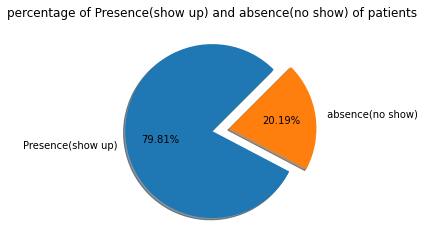

In [20]:
plt.pie([Presence_count,absence_count],labels=['Presence(show up)',' absence(no show)'],autopct='%0.2f%%', startangle=45,explode=(0,.2),shadow=True)
plt.title("percentage of Presence(show up) and absence(no show) of patients");

### Solution:
The number of Presence(show up)  patients = 88207

The number of absence(no show)   patients = 22319

The percentage of Presence(show up)  patients = 79.81 %

The percentage of absence(no show)   patients = 20.19 %



### Research Question 2  ( Is there a gender difference in Presence and absence? what is the percentage of each gender in attendance?)

In [21]:
gender=df_copy.groupby(['Gender','No-show']).count()
gender

PatientId  AppointmentID  ScheduledDay  AppointmentDay    Age  \
Gender No-show                                                                  
F      No           57245          57245         57245           57245  57245   
       Yes          14594          14594         14594           14594  14594   
M      No           30962          30962         30962           30962  30962   
       Yes           7725           7725          7725            7725   7725   

                Neighbourhood  Scholarship  Hipertension  Diabetes  \
Gender No-show                                                       
F      No               57245        57245         57245     57245   
       Yes              14594        14594         14594     14594   
M      No               30962        30962         30962     30962   
       Yes               7725         7725          7725      7725   

                Alcoholism  Handcap  SMS_received  
Gender No-show                                     
F      No            57245    57245         57245  
       Yes           14594    14594         14594  
M      No            30962    30962         30962  
       Yes            7725     7725          7725

In [22]:
#count of male
df_male=df_copy[df_copy['Gender']=='M']
count_male=df_male.count()
#count of Presence male (show up)
df_male_Presence=df_male[df_copy['No-show']=='No']
count_male_Presence=df_male_Presence.count()
#precentage of Presence male (show up):
male_precentage=(count_male_Presence/count_male)*100
print('The precentage of Presence male (show up):\n',male_precentage[1],'%')

The precentage of Presence male (show up):
 80.03205211052808 %


<ipython-input-22-6e35e2c90c7b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_male_Presence=df_male[df_copy['No-show']=='No']


In [23]:
#count of female
df_female=df_copy[df_copy['Gender']=='F']
count_female=df_female.count()
#count of Presence female (show up)
df_female_Presence=df_female[df_copy['No-show']=='No']
count_female_Presence=df_female_Presence.count()
#precentage of Presence female (show up):
female_precentage=(count_female_Presence/count_female)*100
print('The precentage of Presence female (show up):\n',female_precentage[1],'%')

The precentage of Presence female (show up):
 79.68512924734476 %


<ipython-input-23-7bce8a8f400b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_female_Presence=df_female[df_copy['No-show']=='No']


Text(0.5, 1.0, 'comparison of gender who show up and no show ')

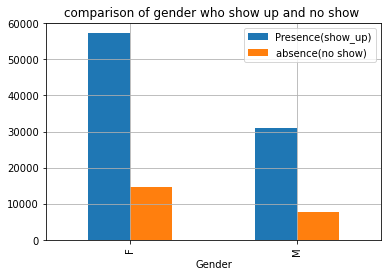

In [24]:
# figure comparison of gender who show up and no show 
gender['Age'].unstack().plot(kind="bar",stacked=False,grid=True)
plt.legend(["Presence(show_up)", "absence(no show)"]);
plt.title('comparison of gender who show up and no show ')

### Solution:
There is no difference on showing up or no between male and female.

The precentage of Presence male (show up):

 80.032 %

The precentage of Presence female (show up):

 79.685 %

    

### Research Question 3  ( Does the time difference between registration and the appointment affect the Presence?)

In [25]:
# add new column time_diff
df_copy['time_diff']=(df_copy['AppointmentDay'].dt.date)-(df_copy['ScheduledDay'].dt.date)
df_copy['time_diff']=df_copy['time_diff'].dt.days
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_diff
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41


In [26]:
#average of difference time between Scheduled Day Appointment Day for showing male and female No mean show:
df_show=df_copy.groupby(['Gender','No-show'])['time_diff'].mean()
df_show

Gender  No-show
F       No          9.093318
        Yes        16.026792
M       No          8.128803
        Yes        15.462524
Name: time_diff, dtype: float64

In [27]:
#maximunm difference time between Scheduled Day Appointment Day
time_diff=df_copy.groupby(['time_diff'])['No-show'].count()
print('maximunm difference time between Scheduled Day Appointment Day:\n',df_copy['time_diff'].max(),'Days')

maximunm difference time between Scheduled Day Appointment Day:
 179 Days


### Solution:
The average difference time between Scheduled Day Appointment Day:

     Presence male (show up)   = 8.13  Days
     
     absence  male (no show)   = 15.46 Days
     
     Presence female (show up) = 9.1   Days
     
     absence  female (no show) = 16.03 Days 
     
The maximunm difference between Scheduled Day Appointment Day:

                179 Days    

### Research Question 4  ( Is the patient’s commitment to attending medical clinic affected by age? )

In [28]:
# first : we divide age to categories (infant,child,teenager,adult,Middle Age Adult,old)
df_copy['age_cat']=''
#df_copy.shape[0]
for i in range(110526):
    if df_copy['Age'].iloc[i]<2:
        df_copy['age_cat'].iloc[i]='infant'
    elif (df_copy['Age'].iloc[i]>=2) and (df_copy['Age'].iloc[i]<12):
        df_copy['age_cat'].iloc[i]='child'
    elif (df_copy['Age'].iloc[i]>=12) and (df_copy['Age'].iloc[i]<18):
        df_copy['age_cat'].iloc[i]='teenager'
    elif (df_copy['Age'].iloc[i]>=18) and (df_copy['Age'].iloc[i]<30):
        df_copy['age_cat'].iloc[i]='adult'
    elif (df_copy['Age'].iloc[i]>=30) and (df_copy['Age'].iloc[i]<59):
        df_copy['age_cat'].iloc[i]='Middle Age Adult'
    else:
        df_copy['age_cat'].iloc[i]='old'
        
          
   
    


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [29]:
df_copy.to_csv('appointments2.csv',index=False)
        

In [30]:
df_copy

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,time_diff,age_cat
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,old
1,558997776694438.0,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Middle Age Adult
2,4262962299951.0,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,old
3,867951213174.0,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,child
4,8841186448183.0,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Middle Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2572134369293.0,5651768,F,2016-05-03 09:15:35+00:00,2016-06-07 00:00:00+00:00,56,MARIA ORTIZ,0,0,0,0,0,1,No,35,Middle Age Adult
110523,3596266328735.0,5650093,F,2016-05-03 07:27:33+00:00,2016-06-07 00:00:00+00:00,51,MARIA ORTIZ,0,0,0,0,0,1,No,35,Middle Age Adult
110524,15576631729893.0,5630692,F,2016-04-27 16:03:52+00:00,2016-06-07 00:00:00+00:00,21,MARIA ORTIZ,0,0,0,0,0,1,No,41,adult
110525,92134931435557.0,5630323,F,2016-04-27 15:09:23+00:00,2016-06-07 00:00:00+00:00,38,MARIA ORTIZ,0,0,0,0,0,1,No,41,Middle Age Adult


In [31]:
#count of old
df_old=df_copy[df_copy['age_cat']=='old']
count_old=df_old.count()
#count of Presence old (show up)
df_old_Presence=df_old[df_old['No-show']=='No']
count_old_Presence=df_old_Presence.count()

#precentage of Presence old (show up):
old_precentage=round((count_old_Presence/count_old)*100,2)
print('The percentage of Presence old (show up):\n',old_precentage[1],'%')
##################################
#count of Middle Age Adult
df_mid_adult=df_copy[df_copy['age_cat']=='Middle Age Adult']
count_mid_adult=df_mid_adult.count()
#count of Presence Middle Age Adult (show up)
df_mid_adult_Presence=df_mid_adult[df_mid_adult['No-show']=='No']
count_mid_adult_old_Presence=df_mid_adult_Presence.count()
#precentage of Presence Middle Age Adul (show up):
mid_adult_precentage=round((count_mid_adult_old_Presence/count_mid_adult)*100,2)
print('The percentage of Presence Middle Age Adul (show up):\n',mid_adult_precentage[1],'%')
##################################
#count of adult
df_adult=df_copy[df_copy['age_cat']=='adult']
count_adult=df_adult.count()
#count of Presence old (show up)
df_adult_Presence=df_adult[df_adult['No-show']=='No']
count_adult_Presence=df_adult_Presence.count()
#precentage of Presence old (show up):
adult_precentage=round((count_adult_Presence/count_adult)*100,2)
print('The percentage of Presence adult (show up):\n',adult_precentage[1],'%')
##################################
#count of teenager
df_teen=df_copy[df_copy['age_cat']=='teenager']
count_teen=df_teen.count()
#count of Presence old (show up)
df_teen_Presence=df_teen[df_teen['No-show']=='No']
count_teen_Presence=df_teen_Presence.count()
#precentage of Presence old (show up):
teen_precentage=round((count_teen_Presence/count_teen)*100,2)
print('The percentage of Presence teenager (show up):\n',teen_precentage[1],'%')

##################################
#count of child
df_child=df_copy[df_copy['age_cat']=='child']
count_child=df_child.count()
#count of Presence child (show up)
df_child_Presence=df_child[df_child['No-show']=='No']
count_child_Presence=df_child_Presence.count()
#precentage of Presence child (show up):
child_precentage=round((count_child_Presence/count_child)*100,2)
print('The percentage of Presence child (show up):\n',child_precentage[1],'%')

##################################
#count of infant
df_infant=df_copy[df_copy['age_cat']=='infant']
count_infant=df_infant.count()
#count of Presence infant (show up)
df_infant_Presence=df_infant[df_infant['No-show']=='No']
count_infant_Presence=df_infant_Presence.count()
#precentage of Presence infant (show up):
infant_precentage=round((count_infant_Presence/count_infant)*100,2)
print('The percentage of Presence infant (show up):\n',infant_precentage[1],'%')


The percentage of Presence old (show up):
 84.61 %
The percentage of Presence Middle Age Adul (show up):
 80.08 %
The percentage of Presence adult (show up):
 75.35 %
The percentage of Presence teenager (show up):
 73.61 %
The percentage of Presence child (show up):
 78.91 %
The percentage of Presence infant (show up):
 81.87 %


In [32]:
count_age_cat=df_copy.groupby(['age_cat','No-show']).count()
count_age_cat['PatientId']

age_cat           No-show
Middle Age Adult  No         34930
                  Yes         8689
adult             No         12607
                  Yes         4124
child             No         11151
                  Yes         2981
infant            No          4758
                  Yes         1054
old               No         19288
                  Yes         3509
teenager          No          5473
                  Yes         1962
Name: PatientId, dtype: int64

Text(0.5, 1.0, 'comparison of age categories who show up and no show ')

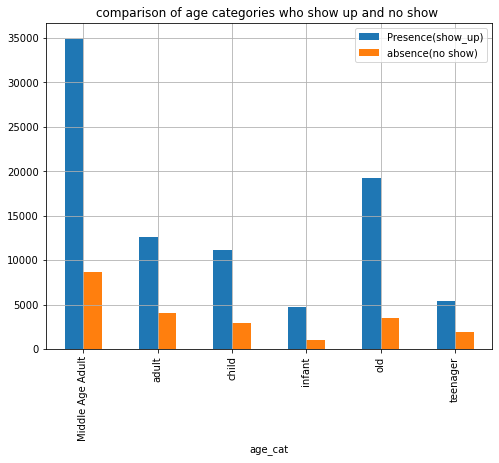

In [33]:
#plot_age=sns.histplot(data=df_copy,x='age_cat',binwidth=10)
count_age_cat['Age'].unstack().plot(kind="bar",stacked=False,grid=True,figsize=(8,6))
plt.legend(["Presence(show_up)", "absence(no show)"]);
plt.title('comparison of age categories who show up and no show ')

### Solution:
1) Yes, the patient’s commitment to attending medical clinic affected by age which we saw the precentage of old who show up was 84.61 % . 

2) The largest number of patients in the adult Middle Age Adult category :43169 patients.

### Research Question 5  ( Does the scholarship affect the patient's attendance at the medical clinic?)

In [34]:
#count of Scholarship  show up
df_scholarship=df_copy[df_copy['Scholarship']==1].shape[0]
df_scholarship_presence=df_copy[(df_copy['Scholarship']==1) & (df_copy['No-show']=='No')].shape[0]

#count of non Scholarship show up
df_non_scholarship=df_copy[df_copy['Scholarship']==0].shape[0]
df_non_scholarship_presence=df_copy[(df_copy['Scholarship']==0) & (df_copy['No-show']=='No')].shape[0]

#the percentage of Presence of Scholarship and non Scholarship patients:
precntage_scholarship=round((df_scholarship_presence/df_scholarship)*100,2)
precntage_non_scholarship=round((df_non_scholarship_presence/df_non_scholarship)*100,2)
print('The percentage of presence Scholarship patients =  ',precntage_scholarship,'%')
print('The percentage of presence non Scholarship patients =  ',precntage_non_scholarship,'%')

The percentage of presence Scholarship patients =   76.26 %
The percentage of presence non Scholarship patients =   80.19 %


### Solution:
yes the scholarship affect the patient's attendance at the medical clinic. Which the percentage of attendance (show up) of 

patients who don't have scholarship (paid) bigger than others.


### Research Question 6  ( Could Hipertension or diabetes miss appointments?)

In [35]:
#count of Hipertension  show up
df_hipertension=df_copy[df_copy['Hipertension']==1].shape[0]
df_hipertension_presence=df_copy[(df_copy['Hipertension']==1) & (df_copy['No-show']=='No')].shape[0]

#count of non Hipertension show up
df_non_hipertension=df_copy[df_copy['Hipertension']==0].shape[0]
df_non_hipertension_presence=df_copy[(df_copy['Hipertension']==0) & (df_copy['No-show']=='No')].shape[0]

#the precentage of Presence of hypertension and non hypertension patients:
precntage_hipertension=round((df_hipertension_presence/df_hipertension)*100,2)
precntage_non_hipertension=round((df_non_hipertension_presence/df_non_hipertension)*100,2)
print('The percentage of presence Hipertension patients =  ',precntage_hipertension,"%")
print('The percentage of presence non Hipertension patients =  ',precntage_non_hipertension,'%')


The percentage of presence Hipertension patients =   82.7 %
The percentage of presence non Hipertension patients =   79.1 %


In [36]:
#count of Diabetes  show up
df_diabetes=df_copy[df_copy['Diabetes']==1].shape[0]
df_diabetes_presence=df_copy[(df_copy['Diabetes']==1) & (df_copy['No-show']=='No')].shape[0]

#count of non Hipertension show up
df_non_diabetes=df_copy[df_copy['Diabetes']==0].shape[0]
df_non_diabetes_presence=df_copy[(df_copy['Diabetes']==0) & (df_copy['No-show']=='No')].shape[0]

#the precentage of Presence of Diabetes and non Diabetes patients:
precntage_diabetes=round((df_diabetes_presence/df_diabetes)*100,2)
precntage_non_diabetes=round((df_non_diabetes_presence/df_non_diabetes)*100,2)
print('The percentage of presence Diabetes patients =  ',precntage_diabetes,"%")
print('The percentage of presence non Diabetes patients =  ',precntage_non_diabetes,'%')


The percentage of presence Diabetes patients =   82.0 %
The percentage of presence non Diabetes patients =   79.64 %


### Solution:
Patients with Hipertension  are more committed to attending medical clinics than others in a small percentage.

Patients with Diabetes   are more committed to attending medical clinics than others in a small percentage.

### Research Question 7 ( Could alcohol drinking be the cause of missing appointments?)

In [37]:
#count of alcoholism  show up
df_alcoholism=df_copy[df_copy['Alcoholism']==1].shape[0]
df_alcoholism_presence=df_copy[(df_copy['Alcoholism']==1) & (df_copy['No-show']=='No')].shape[0]

#count of non alcoholism show up
df_non_alcoholism=df_copy[df_copy['Alcoholism']==0].shape[0]
df_non_alcoholism_presence=df_copy[(df_copy['Alcoholism']==0) & (df_copy['No-show']=='No')].shape[0]

#the precentage of Presence of alcoholism and non alcoholism patients:
precntage_alcoholism=round((df_alcoholism_presence/df_alcoholism)*100,2)
precntage_non_alcoholism=round((df_non_alcoholism_presence/df_non_alcoholism)*100,2)
print('The percentage of presence alcoholic patients =  ',precntage_alcoholism,'%')
print('The percentage of presence non alcoholic patients =  ',precntage_non_alcoholism,'%')

The percentage of presence alcoholic patients =   79.85 %
The percentage of presence non alcoholic patients =   79.81 %


### Solution:
    Alcoholism  does not affect patients' attendance at medical clinics

### Research Question 7  ( Does sending an SMS affect missing appointments? )

In [38]:
#count of SMS_received  show up
df_sms=df_copy[df_copy['SMS_received']==1].shape[0]
df_sms_presence=df_copy[(df_copy['SMS_received']==1) & (df_copy['No-show']=='No')].shape[0]

#count of non SMS_received show up
df_non_sms=df_copy[df_copy['SMS_received']==0].shape[0]
df_non_sms_presence=df_copy[(df_copy['SMS_received']==0) & (df_copy['No-show']=='No')].shape[0]

#the precentage of Presence of SMS_received and non SMS_received patients:
precntage_sms=round((df_sms_presence/df_sms)*100,2)
precntage_non_sms=round((df_non_sms_presence/df_non_sms)*100,2)
print('The percentage of presence SMS_received patients =  ',precntage_sms,'%')
print('The percentage of presence non SMS_received patients =  ',precntage_non_sms,'%')

The percentage of presence SMS_received patients =   72.43 %
The percentage of presence non SMS_received patients =   83.3 %


### Solution:
The percentage of patient they received a SMS and attended to medical clinic less than patient did not receive SMS . and it is illogical

<a id='conclusions'></a>
## Conclusions
The total number of patients 110526.

The number of Presence(show up) patients is 88207 = 79.81 %.

The number of absence(no show) patients is 22319 = 20.19 %


The percentage of Presence male (show up) is 80.032 %

The percentage of Presence female (show up) is 79.685 %

There is no difference on showing up or no between male and female.

The average difference time between Scheduled Day Appointment Day:

     Presence (show up)   = 8.62  Days
     
     absence   (no show)   = 15.75 Days
     

The patient’s commitment to attending medical clinic affected by age which we saw the percentage of old who show up was 84.61 % 

The largest number of patients in the adult Middle Age Adult category :43169 patients. between 30-59 years old.            

The scholarship affect the patient's attendance at the medical clinic. Which the percentage of attendance (show up) of

Patients who don't have scholarship (paid) bigger than others.

Patients with Hipertension are more committed to attending medical clinics than others .

Patients with Diabetes are more committed to attending medical clinics than others .

Alcoholism  does not affect patients' attendance at medical clinics.

The percentage of patient they received a SMS and attended to medical clinic less than patient did not receive SMS . and it is 

illogical.


### Limitations
The dataset collected in a short time about two months and it's not participle to judge on it with all year.

the dataset need more details like weather.

Not mentioning the doctor's specialty.






In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295